In [18]:
# the packages
import pandas as pd
import numpy as np
import networkx as nx

# import my own helper functions
from read import read_sims_result
from clean import cleanup_0IR_exp
from clean import cleanup_network

# deque
from collections import deque

# deep copy
from copy import deepcopy

# random [0,1)
from random import random

# Page Rank
from networkx.algorithms.link_analysis.pagerank_alg import pagerank, pagerank_numpy, pagerank_scipy

# distance
from networkx.algorithms.shortest_paths.generic import shortest_path_length

# logistic regression
from sklearn.linear_model import LogisticRegression

# plot
import matplotlib.pyplot as plt

In [2]:
# independent variables
independent = ["deposits", "cash", "assets", "credit available", "wealth", "leverage", 
         "dummy-0-leverage",
         "wealth-lag", "deposits-lag", "cash-lag", "assets-lag", "leverage-lag", 
         "credit-available-lag", "credit-issued-lag", "dummy-0-leverage-lag",
         "over-leverage-frequency"]

In [3]:
# ###########################
# Read OIR results, and fit the model
# ###########################
df0 = read_sims_result("/Users/xcheng/Documents/Oberlin/Summer2/DataAnalysis/data/0622/0IR300s", 32)
df0c = cleanup_0IR_exp(df0, numNode=32, numPeriod=15, numSim=100, balanced=True)

X = df0c[independent]
y = df0c["default-next"]

final = LogisticRegression(penalty="l1", C=0.007)
final.fit(X,y)

LogisticRegression(C=0.007, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
# make sure no defaults in 0IR
# sum(df0[df0["defaults due to interest"]
#     +df0["defaults due to negative wealth"]
#     +df0["defaults due to deposit shock"] == 0].loc[:,"dot0":"dot30"].values)

In [5]:
# ###########################
# Read & process positive IR results
# ###########################
df_1 = read_sims_result("/Users/xcheng/Documents/Oberlin/Summer2/DataAnalysis/data/0625/1IR", 32)
mx_1n = cleanup_network(df_1, numNode=32, numPeriod=15, numSim=50)
df_1c = cleanup_0IR_exp(df_1, numNode=32, numPeriod=15, numSim=50)

In [95]:
df_1.loc[:50,"dot30":]

,dot30,period,theta (risk aversion),defaults due to interest,defaults due to negative wealth,defaults due to deposit shock,over leverages,wealth,debt to pay,credit available,debt owed,credit issued,deposits,cash,assets,sim#,bankID,book_wealth
0,0.000000,1,0.05,0,0,0,0,4.000000,0.00000,0.00000,0.000000,50.00000,40.000000,20.00000,30.00000,0,0,10.000000
1,0.000000,1,0.10,0,0,0,0,4.000000,0.00000,0.00000,0.000000,50.00000,40.000000,20.00000,30.00000,0,1,10.000000
2,0.000000,1,0.15,0,0,0,0,4.000000,0.00000,0.00000,0.000000,50.00000,40.000000,20.00000,30.00000,0,2,10.000000
3,0.000000,1,0.20,0,0,0,0,4.000000,0.00000,0.00000,0.000000,38.46150,40.000000,20.00000,30.00000,0,3,10.000000
4,0.000000,1,0.25,0,0,0,0,4.000000,0.00000,0.00000,0.000000,30.76920,40.000000,20.00000,30.00000,0,4,10.000000
5,0.000000,1,0.30,0,0,0,0,4.871790,0.00000,0.00000,0.000000,25.64100,40.000000,24.35900,25.64100,0,5,10.000000
6,0.000000,1,0.35,0,0,0,0,5.604400,0.00000,0.00000,0.000000,21.97800,40.000000,28.02200,21.97800,0,6,10.000000
7,0.000000,1,0.40,0,0,0,0,6.153850,0.00000,0.00000,0.000000,19.23080,40.000000,30.76920,19.23080,0,7,10.000000
8,0.000000,1,0.45,0,0,0,0,6.581200,0.00000,0.00000,0.000000,17.09400,40.000000,32.90600,17.09400,0,8,10.000000
9,0.000000,1,0.50,0,0,0,0,6.923080,0.00000,0.00000,0.000000,15.38460,40.000000,34.61540,15.38460,0,9,10.000000


In [93]:
df_1c.loc[:50,:]

,sim#,period,bankID,theta (risk aversion),wealth,deposits,cash,assets,leverage,credit available,...,assets-lag,leverage-lag,credit-available-lag,credit-issued-lag,dummy-0-leverage-lag,over-leverage-frequency,default-next-wealth,default-next-deposit,default-next-interest,default-next
0,0,2,1,0.10,13.101000,0.574105,0.00000,32.94600,0.673227,0.000000,...,30.00000,4.000000,0.00000,50.00000,0,0.000000,0,0,0,0
1,0,2,2,0.15,23.465800,7.618780,0.00000,50.22070,0.548420,1.923080,...,30.00000,4.000000,0.00000,50.00000,0,0.000000,0,0,0,0
2,0,2,3,0.20,0.923077,51.017300,7.06172,45.38460,5.101710,14.733100,...,30.00000,4.000000,0.00000,38.46150,0,0.500000,0,0,0,0
3,0,2,4,0.25,1.538460,108.410000,69.60400,42.30770,10.841239,14.989500,...,30.00000,4.000000,0.00000,30.76920,0,0.500000,0,0,0,0
4,0,2,5,0.30,2.894590,27.853500,0.00000,35.52710,2.894582,14.068000,...,25.64100,4.000000,0.00000,25.64100,0,0.000000,0,0,0,0
5,0,2,6,0.35,4.584640,45.846400,25.10660,27.07680,4.584640,15.282500,...,21.97800,4.000000,0.00000,21.97800,0,0.000000,0,0,0,0
6,0,2,7,0.40,3.786980,27.024500,2.11324,31.06510,2.702453,15.374100,...,19.23080,4.000000,0.00000,19.23080,0,0.000000,0,0,0,0
7,0,2,8,0.45,4.331210,42.656200,20.89350,28.34390,4.265620,15.445300,...,17.09400,4.000000,0.00000,17.09400,0,0.000000,0,0,0,0
8,0,2,9,0.50,4.792900,39.592500,20.48000,26.03550,3.959282,15.502300,...,15.38460,4.000000,0.00000,15.38460,0,0.000000,0,0,0,0
9,0,2,10,0.55,6.234040,0.000000,0.00000,18.82980,1.022840,5.320510,...,13.98600,4.000000,0.00000,13.98600,0,0.000000,0,0,0,0


In [29]:
def create_edge_weight(N, dff, mid):
    """
    Calculate weight for edges
    Each debt is divided by lenders' wealth (w/o haircut)，
    The result number r is scaled to [0, 1) using g(r)=r/(mid+r)
    
    Parameters
    ----------
    N: 4D numpy array [n_simulations, n_periods, n_borrowers, n_lenders]
        debt adjacency matrices 
    df: Pandas dataframe (no cleanup)
        where we get banks' wealth (w/o haircut)
    mid: int
        the debt-to-wealth ratio resulting in 50% probability of spreading default
    
    Returns
    ----------
    WN: 4D numpy array [n_simulations, n_periods - 2, n_borrowers, n_lenders]
        new weighted debt adjacency matrices
    """
    
    WN = np.copy(N)
    simNum, periodNum, bankNum, _= N.shape
    dff["book_wealth"] = (dff["assets"] + dff["cash"] + dff["debt owed"] 
                         - dff["debt to pay"] - dff["deposits"])
    
    for s in range(simNum):
        for p in range(1,periodNum-1):
            for lender in range(bankNum):
                w = dff[np.array(dff["sim#"]==s) &
                        np.array(dff["period"]==p) & 
                        np.array(dff["bankID"]==lender)
                       ]["book_wealth"].values[0]
                
                # helper function
                def f(a):
                    if a > 0: # there is debt
                        if w > 0: # positive wealth
                            t = a/w
                            return t/(t+mid)
                        else: # 0 or negative wealth
                            return 100/(100+mid)
                    else: # no debt or weird data 
                        return 0
                
                WN[s, p-1, :, lender] = [f(k) for k in WN[s, p-1, :, lender]]
                    
    return WN

In [30]:
def create_node_weight(N, dff, model, variables):
    """
    Calculate weight for nodes
    Each debt is multiplied by lenders' predicted default probability
    
    Parameters
    ----------
    N: 4D numpy array [n_simulations, n_periods, n_borrowers, n_lenders]
        debt adjacency matrices 
    dff: Pandas dataframe (yes cleanup)
        where we get bank's balance sheet info
    model: model for default probability
        scikit learn LogisticRegression
    variables: a list of strings
        independent variables for the model
    
    Returns
    ----------
    WN: 3D numpy array [n_simulations, n_periods, n_banks]
        array of predicted probability of default
    """
    
    simNum, periodNum, bankNum, _= N.shape
    WN = np.empty((simNum, periodNum, bankNum))
    WN.fill(-1)
    
    for s in range(simNum):
        for p in range(1,periodNum-1):
            for b in range(bankNum):
                X = dff[np.array(dff["sim#"]==s) &
                        np.array(dff["period"]==p) & 
                        np.array(dff["bankID"]==b)
                       ][variables].values
                if X.any():
                    predicted_default_probability = model.predict_proba(X)[0][1]
                    WN[s, p-1, b] = predicted_default_probability
                    
    return WN

In [31]:
edge_weights_all = create_edge_weight(mx_1n, df_1, 0.6)
node_weights_all = create_node_weight(mx_1n, df_1c, final, independent)

In [11]:
d=[9,10,101]
a={k:d[k] for k in range(3)}
a

{0: 9, 1: 10, 2: 101}

In [22]:
a= deque([3,4])
len(a)

2

In [87]:
G=nx.DiGraph(edge_weights_all[0,1])
# G.edges[(0, 1)]['weight']
list(G.successors(10))

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [35]:
v = frozenset([2,4,5,7])
j = set(v)
j.add(18)
v, j

(frozenset({2, 4, 5, 7}), {2, 4, 5, 7, 18})

In [97]:
node_weights_all[0,0]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.])

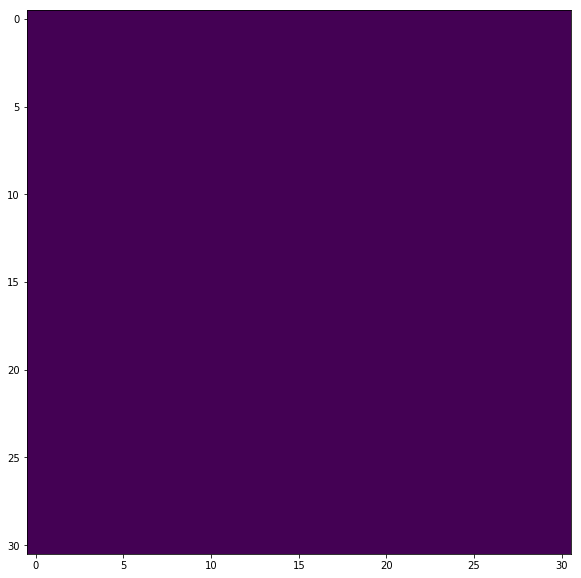

In [96]:
plt.figure(figsize=(10,10))
plt.imshow(edge_weights_all[0,0], interpolation='nearest')
plt.show()

In [88]:
edge_weights_all[0,1,10]

array([0.        , 0.        , 0.        , 0.17605561, 0.14598802,
       0.12468808, 0.10881396, 0.09652523, 0.08673033, 0.07874081,
       0.        , 0.0664893 , 0.06169027, 0.0575368 , 0.05390851,
       0.        , 0.04786973, 0.04533087, 0.04304773, 0.03910829,
       0.03582942, 0.03305792, 0.03068422, 0.0286288 , 0.02683137,
       0.02524632, 0.02383788, 0.02257837, 0.0214454 , 0.03739723,
       0.0343877 ])

In [36]:
n=10
N=[11]
n, N

(10, [11])

In [89]:
def customized_random_walk_exp(N, solvent, iterations=10):
    """
    NEW NEW NEW modified random walk algorithm
    
    Parameters
    ----------
    N: 2D numpy array [n_borrowers, n_lenders]
        debt adjacency matrices 
    solvent: list 
        solvent[solvent bank] = predicted default probability
        solvent[insolvent bank] = -1
    iterations: int
        number of iterations
    
    Returns
    ----------
    
    """
    num_bank, _ = N.shape
    G = nx.DiGraph(N)
    nextDefault = deque()
    defaulted = frozenset([i for i in range(num_bank) if solvent[i] == -1])
    tempDefault = set(defaulted)
    probDefault = {i:solvent[i] for i in range(num_bank) if solvent[i] >= 0}
    result = dict(zip(list(probDefault.keys()), [0 for _ in probDefault.keys()]))
    def coin(p=0.5):
        return random() < p
    
    for _ in range(iterations):
        for b in probDefault.keys():
            print("initial bank:", b)
            if coin(probDefault[b]): 
                nextDefault.append(b)
            while len(nextDefault) > 0: # queue not empty
                n = nextDefault.popleft() # next on the queue
                if n not in tempDefault: # not aleady defaulted
                    tempDefault.add(n)
                    result[n] += 1
                    for s in G.successors(n): # creditors of n
                        if s not in tempDefault and coin(G.edges[(n,s)]['weight']):
                            nextDefault.append(s)
                print("--- currently default:", tempDefault)
                print("--- death roll:", nextDefault)
             
            
            print("currently default:", tempDefault)
            print("death roll:", nextDefault)
                
            tempDefault = set(defaulted)
            
        print(result)
    return result

In [90]:
customized_random_walk_exp(edge_weights_all[0,1], node_weights_all[0,0])

initial bank: 1
--- currently default: {0, 1}
--- death roll: deque([5, 13])
--- currently default: {0, 1, 5}
--- death roll: deque([13])
--- currently default: {0, 1, 13, 5}
--- death roll: deque([])
currently default: {0, 1, 13, 5}
death roll: deque([])
initial bank: 2
currently default: {0}
death roll: deque([])
initial bank: 3
--- currently default: {0, 3}
--- death roll: deque([])
currently default: {0, 3}
death roll: deque([])
initial bank: 4
--- currently default: {0, 4}
--- death roll: deque([])
currently default: {0, 4}
death roll: deque([])
initial bank: 5
--- currently default: {0, 5}
--- death roll: deque([])
currently default: {0, 5}
death roll: deque([])
initial bank: 6
--- currently default: {0, 6}
--- death roll: deque([])
currently default: {0, 6}
death roll: deque([])
initial bank: 7
--- currently default: {0, 7}
--- death roll: deque([])
currently default: {0, 7}
death roll: deque([])
initial bank: 8
currently default: {0}
death roll: deque([])
initial bank: 9
--- cu

--- death roll: deque([21])
--- currently default: {0, 12, 21}
--- death roll: deque([])
currently default: {0, 12, 21}
death roll: deque([])
initial bank: 13
--- currently default: {0, 13}
--- death roll: deque([])
currently default: {0, 13}
death roll: deque([])
initial bank: 14
currently default: {0}
death roll: deque([])
initial bank: 15
--- currently default: {0, 15}
--- death roll: deque([])
currently default: {0, 15}
death roll: deque([])
initial bank: 16
currently default: {0}
death roll: deque([])
initial bank: 17
currently default: {0}
death roll: deque([])
initial bank: 18
--- currently default: {0, 18}
--- death roll: deque([])
currently default: {0, 18}
death roll: deque([])
initial bank: 19
currently default: {0}
death roll: deque([])
initial bank: 20
--- currently default: {0, 20}
--- death roll: deque([])
currently default: {0, 20}
death roll: deque([])
initial bank: 21
currently default: {0}
death roll: deque([])
initial bank: 22
currently default: {0}
death roll: dequ

{1: 3,
 2: 3,
 3: 13,
 4: 12,
 5: 11,
 6: 10,
 7: 12,
 8: 9,
 9: 6,
 10: 3,
 11: 5,
 12: 6,
 13: 5,
 14: 6,
 15: 5,
 16: 6,
 17: 5,
 18: 3,
 19: 2,
 20: 4,
 21: 3,
 22: 3,
 23: 1,
 24: 3,
 25: 1,
 26: 0,
 27: 0,
 28: 0,
 29: 1,
 30: 4}

In [16]:
def dist_avg_max(N):
    """
    calculate average & max distances between all pair of nodes
    
    Parameters
    ----------
    N: 4D numpy array [n_simulations, n_periods, n_borrowers, n_lenders]
        debt adjacency matrices 
    
    Returns
    ----------
    avg_d: 2D numpy array [n_simulations, n_periods]
        average distances between all pair of nodes
    max_d: 2D numpy array [n_simulations, n_periods]
        max distances between all pair of nodes
    """
    numSim, numPeriod, _, _ = N.shape
    avg_d = np.empty((numSim, numPeriod-2))
    max_d = np.empty((numSim, numPeriod-2))
    
    for s in range(numSim):
        for p in range(1,numPeriod-1):
            disG = nx.DiGraph(N[s,p])
            dists = shortest_path_length(disG, weight=None)
            curlist=[]
            for source in dists:
                curlist.extend(source[1].values())
            avg_d[s,p-1] = sum(curlist) / float(len(curlist))
            max_d[s,p-1] = max(curlist)
            
    return avg_d, max_d

In [5]:
# ###########################
# Visualize max/avg distances between banks
# ###########################
# avgg, maxx = dist_avg_max(mx_1n)
#
# pavg = pd.DataFrame(avgg)
# pmax = pd.DataFrame(maxx)
# # pavg.mean().plot()
# abc = pmax.stack().value_counts().sort_index().plot(
#     kind="bar",
#     title="max distances, 1 interest rates, 50 simulations, 15 periods",
#     figsize=(8,6),
#     fontsize=12
# )
# abc.set_xlabel("max distance between any pair of reachable nodes")
# abc.set_ylabel("frequncy")
# abc.title.set_fontsize(15)
# abc.xaxis.label.set_fontsize(15)
# abc.yaxis.label.set_fontsize(15)

In [6]:
def weigh_networks(N, model, variables):
    """
    Add weight to network
    Each debt is multiplied by lenders' predicted default probability
    
    Parameters
    ----------
    N: 4D numpy array [n_simulations, n_periods, n_borrowers, n_lenders]
        debt adjacency matrices 
    model: scikit learn LogisticRegression
        model for default probability
    variables: a list of strings
        independent variables for the model
    
    Returns
    ----------
    WN: 4D numpy array [n_simulations, n_periods, n_borrowers, n_lenders]
        new weighted debt adjacency matrices
    """
    
    WN = np.copy(N)
    simNum, periodNum, bankNum, _= N.shape
    
    for s in range(simNum):
        for p in range(1,periodNum-1):
            for b in range(bankNum):
                X = df_1c[np.array(df_1c["sim#"]==s) &
                          np.array(df_1c["period"]==p) & 
                          np.array(df_1c["bankID"]==b)
                         ][variables].values
                if X.any():
                    predicted_default_probability = model.predict_proba(X)[0][1]
                    WN[s, p-1, b] *= predicted_default_probability
                    
    return WN

In [46]:
def my_pagerank_numpy(G, alpha=0.85, personalization=None, weight='weight', dangling=None):
    """
    This is basically pagerank_numpy without normalization.
    """
    from networkx.algorithms.link_analysis.pagerank_alg import google_matrix
    
    if len(G) == 0:
        return {}
    M = google_matrix(G, alpha, personalization=personalization,
                      weight=weight, dangling=dangling)
    # use numpy LAPACK solver
    eigenvalues, eigenvectors = np.linalg.eig(M.T)
    ind = np.argmax(eigenvalues)
    # eigenvector of largest eigenvalue is at ind
    largest = np.array(eigenvectors[:, ind]).flatten().real
    return dict(zip(G, map(float, abs(largest))))

In [8]:
def apply_to_networks(f, N):
    """
    Calculate Page Rank scores for all the networks 
    
    Parameters
    ----------
    f: function (2D numpy array -> matrix)
        the function to apply to each network (e.g. Page Rank)
    N: 4D numpy array [n_simulations, n_periods, n_borrowers, n_lenders]
        debt adjacency matrices (netowrks)
    
    Returns
    ----------
    PG: 3D numpy array [n_simulations, n_periods, n_banks]
        Page Rank scores
    """
    
    simNum, periodNum, bankNum, _= N.shape
    PG = np.empty((simNum, periodNum, bankNum))
    
    for s in range(simNum):
        for p in range(1,periodNum-1):
            PG[s, p] = np.array(list(f(nx.DiGraph(N[s, p])).values()))
            
    return PG

In [9]:
# ###########################
# Let's add the weight
# ###########################
weighted = weigh_networks(mx_1n, final, independent)

In [50]:
# ###########################
# Let's calculate pagerank
# ###########################
pg_iter = apply_to_networks(pagerank, weighted)
pg_norm = apply_to_networks(pagerank_numpy, weighted)
pg_not_norm = apply_to_networks(my_pagerank_numpy, weighted)

In [11]:
# weighted[2,1]

array([[0.        , 0.        , 0.        , 0.55679311, 0.        ,
        0.37119584, 0.31816793, 0.27839699, 0.24746404, 0.22271768,
        0.        , 0.        , 0.17132099, 0.        , 0.14847816,
        0.13919849, 0.13101022, 0.1237318 , 0.11721992, 0.10605583,
        0.09683349, 0.0890869 , 0.08248816, 0.07679927, 0.07184436,
        0.06749007, 0.0636335 , 0.06019385, 0.05710685, 0.10123511,
        0.09279885],
       [0.90888626, 0.        , 0.        , 1.10676712, 0.        ,
        0.73784561, 0.63243922, 0.55338442, 0.49189736, 0.44270771,
        0.        , 0.        , 0.34054379, 0.31621918, 0.2951379 ,
        0.27669221, 0.26041594, 0.02459482, 0.23300424, 0.21081278,
        0.19248105, 0.17708274, 0.16396607, 0.15265798, 0.14280883,
        0.13415359, 0.12648767, 0.1196505 , 0.11351431, 0.20123039,
        0.18446119],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.854701  , 0.732601  , 0.641026  , 0.569801  , 0.512821  ,
      

In [55]:
# print(pg_norm[2,5])
# print(pg_not_norm[2,5])
# print(pg_iter[2,5])

[0.11687229 0.02476124 0.02476124 0.02476124 0.02823983 0.02476124
 0.02476124 0.02476124 0.02476124 0.02476124 0.02476124 0.02729223
 0.02601555 0.02532974 0.02686557 0.02615693 0.02476124 0.02476124
 0.02476124 0.02615299 0.02612805 0.02609152 0.02476124 0.04704637
 0.02476124 0.02590666 0.02476124 0.12516966 0.02579149 0.02476124
 0.02476124]
[0.52470098 0.1111662  0.1111662  0.1111662  0.12678343 0.1111662
 0.1111662  0.1111662  0.1111662  0.1111662  0.1111662  0.12252911
 0.11679742 0.11371847 0.12061363 0.11743215 0.1111662  0.1111662
 0.1111662  0.11741448 0.11730252 0.11713852 0.1111662  0.21121584
 0.1111662  0.11630858 0.1111662  0.56195221 0.11579153 0.1111662
 0.1111662 ]
[0.11687167 0.02476123 0.02476123 0.02476123 0.0282398  0.02476123
 0.02476123 0.02476123 0.02476123 0.02476123 0.02476123 0.0272922
 0.02601552 0.02532972 0.02686554 0.0261569  0.02476123 0.02476123
 0.02476123 0.02615297 0.02612803 0.0260915  0.02476123 0.04704618
 0.02476123 0.02590664 0.02476123 0.1251

In [51]:
list(map(sum, pg_norm[2]))

[2.297e-321,
 0.9999999999999991,
 0.9999999999999996,
 0.9999999999999989,
 0.9999999999999997,
 0.9999999999999996,
 0.9999999999999994,
 0.9999999999999992,
 0.9999999999999994,
 0.9999999999999999,
 1.0,
 0.9999999999999989,
 0.9999999999999999,
 0.9999999999999994,
 2.297e-321]

In [48]:
list(map(sum, pg_not_norm[2]))

[5e-324,
 5.349312795049792,
 5.517578323552296,
 5.387735920975884,
 5.455519363980492,
 4.489524304219675,
 4.256502893411028,
 5.345194283759503,
 4.035284248932143,
 4.820835260660966,
 5.520366540145044,
 4.444792152498667,
 5.41165333853417,
 5.155045966659313,
 5e-324]

In [1]:
pg_not_norm[2]

NameError: name 'pg_not_norm' is not defined

In [17]:
# pg = pagerank_numpy(G)
# print(type(pg))
# for k,v in pg.items():
#     print("{:<3}| {:.8}".format(k,v))

In [18]:
ddd=nx.DiGraph()
ddd.add_weighted_edges_from([('A','B',0.5),('A','C',0.5)])
print(pagerank_numpy(ddd))
ddd['A']['C']['weight']=1
print(pagerank_numpy(ddd))  

{'A': 0.2597402597402597, 'B': 0.37012987012987014, 'C': 0.37012987012987014}
{'A': 0.2597402597402599, 'B': 0.3333333333333334, 'C': 0.40692640692640686}


In [19]:
mmm = np.array([[0.5,0.05,1],[0,0,0],[1,3,4]])
pdd=nx.DiGraph(mmm)
pdd[0][1]

{'weight': 0.05}